In this notebook I will test the effect of parenthood (x) on the publication productivity (y) of
researchers at different career stages in Europe by using two ways fixed effects method. This means we control for variation within the individuals themselves, and to external factors such as Covid Pandemic. For more details, read Nick Huntington-Klein Chapter 16.

No. of Publications = Productivity

In [1]:
import pandas as pd

df = pd.read_pickle('get_data/orcid_and_scopus_from_oA_combined.pkl')
df.head()

,ResponseId,works_count,cited_by_count,counts_by_year,affiliations,last_known_institutions,works_api_url,main_domain
0,R_2DUIfkur5fbOgZo,132,1211,"[{'year': 2025, 'works_count': 3, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I102134673', 'ro...",https://api.openalex.org/works?filter=author.i...,Social Sciences
1,R_46yreKgPLBawn3H,55,813,"[{'year': 2025, 'works_count': 0, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I91136226', 'ror...",https://api.openalex.org/works?filter=author.i...,Physical Sciences
2,R_2ZTGtufLu3KUHW9,30,224,"[{'year': 2025, 'works_count': 7, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I322491407', 'ro...",https://api.openalex.org/works?filter=author.i...,Health Sciences
3,R_1gzm4gKhyxKNWBW,11,24,"[{'year': 2025, 'works_count': 1, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I8765205', 'ror'...",https://api.openalex.org/works?filter=author.i...,Physical Sciences
4,R_3w5HE5P6WKA3ErS,14,24,"[{'year': 2025, 'works_count': 1, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I4210095952', 'r...",https://api.openalex.org/works?filter=author.i...,Social Sciences


In [2]:
df_original = pd.read_excel('../../data/original_raw_data/Parenthood in Academia_November 26, 2024_08.26.xlsx')
df_original.head()

/Users/Paula_1/opt/anaconda3/envs/parenthood/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,LA2,LA3,LA4a,LA4b,C1,C1_3_TEXT,C1_4_TEXT,C1_5_TEXT,C2,gender
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,How would you estimate the percentage of women...,Have you considered leaving academia?,Please briefly elaborate on your reasons for c...,Please briefly elaborate on your reasons for l...,How did you hear about this survey? - Selected...,How did you hear about this survey? - Social m...,How did you hear about this survey? - Mailing ...,How did you hear about this survey? - Other (p...,Do you have any other comments related to this...,gender
1,2024-03-25 15:45:50,2024-03-25 15:58:19,IP Address,100,748,True,2024-03-25 15:58:20.398000,R_2jpMi7QsRScengv,email,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woman
2,2024-03-26 17:00:29,2024-03-26 17:17:43,IP Address,100,1034,True,2024-03-26 17:17:44.908000,R_4ScOupmxBzBk7dL,email,EN,...,NaN,NaN,NaN,NaN,Formal invitation via email by the authors of ...,NaN,NaN,NaN,NaN,Man
3,2024-03-29 16:09:27,2024-03-29 16:39:04,IP Address,100,1777,True,2024-03-29 16:39:07.534000,R_77h3lBm8zYTS5a1,email,EN,...,About the same,"Yes, a few times","The path demands significant sacrifices, espec...",NaN,Formal invitation via email by the authors of ...,NaN,NaN,NaN,The questions about # of papers expected or pr...,Woman
4,2024-04-16 12:45:38,2024-04-16 12:55:21,IP Address,100,583,True,2024-04-16 12:55:22.733000,R_2V4kjf4gOQNH6EL,anonymous,EN,...,Higher,Not at all,NaN,NaN,Formal invitation via email by the authors of ...,NaN,NaN,NaN,NaN,Woman


Now I need to see the other rows of the response Ids from df, which resulted in nicely structured temporal data for the researchers providing orcid or scopus, in the original data.

In [3]:
filtered_df = df_original[df_original['ResponseId'].isin(df['ResponseId'])]
filtered_df.head()


,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,LA2,LA3,LA4a,LA4b,C1,C1_3_TEXT,C1_4_TEXT,C1_5_TEXT,C2,gender
28,2024-04-30 09:22:04,2024-04-30 09:40:52,IP Address,100,1127,True,2024-04-30 09:40:53.051000,R_2DUIfkur5fbOgZo,email,EN,...,About the same,"Yes, a few times",The sense of entitlement currently displayed b...,NaN,Formal invitation via email by the authors of ...,NaN,NaN,NaN,Sweden has a fantastic nation-wide policy for ...,Woman
36,2024-04-30 11:14:11,2024-04-30 11:25:40,IP Address,100,688,True,2024-04-30 11:25:41.272000,R_46yreKgPLBawn3H,email,EN,...,NaN,NaN,NaN,NaN,Formal invitation via email by the authors of ...,NaN,NaN,NaN,NaN,Man
37,2024-04-30 11:09:58,2024-04-30 11:31:47,IP Address,100,1308,True,2024-04-30 11:31:47.921000,R_2ZTGtufLu3KUHW9,email,EN,...,NaN,NaN,NaN,NaN,Invitation by a colleague who is NOT an author...,NaN,NaN,NaN,NaN,Man
40,2024-04-30 08:09:55,2024-04-30 13:52:48,IP Address,100,20572,True,2024-04-30 13:52:49.482000,R_1gzm4gKhyxKNWBW,email,EN,...,About the same,"Yes, a few times",Low salary and irregular work schedule,NaN,Formal invitation via email by the authors of ...,NaN,NaN,NaN,NaN,Woman
44,2024-05-01 16:17:18,2024-05-01 16:34:43,IP Address,100,1044,True,2024-05-01 16:34:44.262000,R_3w5HE5P6WKA3ErS,email,EN,...,About the same,"Yes, a few times","Lack of stability, lack of positions in desire...",NaN,Formal invitation via email by the authors of ...,NaN,NaN,NaN,NaN,Man


In [14]:
columns_to_keep = [
    'DE8', 'ResponseId', 'DE22', 'PL6_1', 'PL6_2', 'DE23_1_1', 'DE23_1_2', 'DE2'
]

result_df = filtered_df[columns_to_keep]
result_df.head()

,DE8,ResponseId,DE22,PL6_1,PL6_2,DE23_1_1,DE23_1_2,DE2
28,"I am tenured (please, indicate the year you re...",R_2DUIfkur5fbOgZo,2,"Yes, and I did not do anything work-related du...","Yes, and I spent about half of that time on wo...",2008,Sweden,Woman
36,"Other (please, specify)",R_46yreKgPLBawn3H,2,NaN,NaN,1986,United Kingdom,Man
37,I am a tenure-track faculty,R_2ZTGtufLu3KUHW9,3,"No, I did not take the leave","No, I did not take the leave",2014,Turkey,Man
40,I am a postdoc,R_1gzm4gKhyxKNWBW,1,"Yes, and I did not do anything work-related du...",NaN,2016,Ukraine,Woman
44,I am a postdoc,R_3w5HE5P6WKA3ErS,0,NaN,NaN,NaN,NaN,Man


In [17]:
num_zero_or_nan = result_df[result_df['DE22'].isna() | (result_df['DE22'] == '0')].shape[0]
print(f"Rows with 0 or NaN in DE22: {num_zero_or_nan}")

Rows with 0 or NaN in DE22: 16


In [16]:
len(result_df)

1220

We have only 16 researchers without children in this dataset

In [19]:
# to get an idea about how many took and did not take parental leave 

yes_count = result_df['PL6_1'].str.startswith('Yes', na=False).sum()
no_count = result_df['PL6_1'].str.startswith('No', na=False).sum()
nan_count = result_df['PL6_1'].isna().sum()


print(f"Rows where PL6_1 starts with 'Yes': {yes_count}")
print(f"Rows where PL6_1 starts with 'No': {no_count}")
print(f"Rows where PL6_1 is NaN: {nan_count}")


Rows where PL6_1 starts with 'Yes': 550
Rows where PL6_1 starts with 'No': 170
Rows where PL6_1 is NaN: 500


In [20]:
# this is just to get the col names right from another df where I put it down
col_names = pd.read_excel('../../data/H1_analysis/H1_data_NumChildren.xlsx')
display(col_names.iloc[[0]])

,DE8,ResponseId,DE13c_1_TEXT,DE22,PL6_1,PL6_2,PL6_3,PL6_4,PL6_5,PL6_6,PL6_7,PL6_8,PL6_9,PL6_10,DE23_1_2,DE2
0,AcademicPosition,Response ID,NumPublications,NumChildren,ParentalLeave1,ParentalLeave2,ParentalLeave3,ParentalLeave4,ParentalLeave5,ParentalLeave6,ParentalLeave7,ParentalLeave8,ParentalLeave9,ParentalLeave10,ChildBornCountry1,GenderIdentity


Now, we only consider the first child.

Merge df (orcid and scopus Ids with the data from original df)

In [21]:
num_in_df = df['ResponseId'].nunique()
num_in_filtered = result_df['ResponseId'].nunique()
num_common = df['ResponseId'].isin(result_df['ResponseId']).sum()

print(f"Unique ResponseIds in df: {num_in_df}")
print(f"Unique ResponseIds in filtered_df: {num_in_filtered}")
print(f"Matching ResponseIds: {num_common}")

Unique ResponseIds in df: 1220
Unique ResponseIds in filtered_df: 1220
Matching ResponseIds: 1220


In [24]:
merged_df = df.merge(result_df, on='ResponseId', how='inner')
print(f"Merged DataFrame shape: {merged_df.shape}")

Merged DataFrame shape: (1220, 15)


In [25]:
merged_df.head()

,ResponseId,works_count,cited_by_count,counts_by_year,affiliations,last_known_institutions,works_api_url,main_domain,DE8,DE22,PL6_1,PL6_2,DE23_1_1,DE23_1_2,DE2
0,R_2DUIfkur5fbOgZo,132,1211,"[{'year': 2025, 'works_count': 3, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I102134673', 'ro...",https://api.openalex.org/works?filter=author.i...,Social Sciences,"I am tenured (please, indicate the year you re...",2,"Yes, and I did not do anything work-related du...","Yes, and I spent about half of that time on wo...",2008,Sweden,Woman
1,R_46yreKgPLBawn3H,55,813,"[{'year': 2025, 'works_count': 0, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I91136226', 'ror...",https://api.openalex.org/works?filter=author.i...,Physical Sciences,"Other (please, specify)",2,NaN,NaN,1986,United Kingdom,Man
2,R_2ZTGtufLu3KUHW9,30,224,"[{'year': 2025, 'works_count': 7, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I322491407', 'ro...",https://api.openalex.org/works?filter=author.i...,Health Sciences,I am a tenure-track faculty,3,"No, I did not take the leave","No, I did not take the leave",2014,Turkey,Man
3,R_1gzm4gKhyxKNWBW,11,24,"[{'year': 2025, 'works_count': 1, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I8765205', 'ror'...",https://api.openalex.org/works?filter=author.i...,Physical Sciences,I am a postdoc,1,"Yes, and I did not do anything work-related du...",NaN,2016,Ukraine,Woman
4,R_3w5HE5P6WKA3ErS,14,24,"[{'year': 2025, 'works_count': 1, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I4210095952', 'r...",https://api.openalex.org/works?filter=author.i...,Social Sciences,I am a postdoc,0,NaN,NaN,NaN,NaN,Man


we need to exclude the researchers, that did not provide any information on whether they took leave or not. 

In [28]:
df_firstchild = merged_df[~((merged_df['DE22'] > 0) & merged_df['PL6_1'].isna())].copy()
len(df_firstchild)

1037

Now, remove cases where the first child was born outside europe

In [29]:
# Remove rows where the 'ChildBornCountry1' is not in Europe or is not NaN

european_countries = [
    "Albania",
    "Andorra",
    "Austria",
    "Belgium",
    "Bosnia and Herzegovina",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Ireland",
    "Italy",
    "Latvia",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Moldova",
    "Monaco",
    "Netherlands",
    "Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "San Marino",
    "Serbia and Montenegro",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden",
    "Switzerland",
    "United Kingdom",
    "Vatican City (Holy See)"
]

df_europe = df_firstchild[df_firstchild['DE23_1_2'].isin(european_countries) | df_firstchild['DE23_1_2'].isna()]
non_europe_df = df_firstchild[df_firstchild['DE23_1_2'].notna() & ~df_firstchild['DE23_1_2'].isin(european_countries)]



In [30]:
print(f"Number of rows in non-European countries: {len(non_europe_df)}")
print(f"Child Born Countries in non-European DF: {non_europe_df['DE23_1_2'].unique()}")

Number of rows in non-European countries: 57
Child Born Countries in non-European DF: ['Turkey' 'Ukraine' 'United States' 'Russia'
 'Congo, Democratic Republic of the' 'Tanzania' 'Canada' 'Ethiopia'
 'India' 'New Zealand' 'Israel' 'Brazil' 'Chile' 'Guadeloupe' 'Iran'
 'Malaysia' 'Colombia' 'Australia' 'Georgia' 'Nepal' 'Egypt']


In [31]:
df_europe
len(df_europe)

980

## Split The Dataset

We now want to split the dataset into groups:
 - Group A: Took parental leave
 - Group B: Did not take parental leave
 
 Note: if someone spends time working during parental leave, they are still a member of group A

In [32]:
df_parents = df_firstchild[df_firstchild['DE22'] > 0]
len(df_parents)

720

In [33]:
# I changed the df to used back to df_europe, because we also want to include non parents
df_europe['TookLeave_child1'] = df_europe['PL6_1'].str.startswith('Yes').fillna(False).astype(int)
df_europe.head()

/var/folders/4n/x6xrnlyj6nngzc77qzc7h4f40000gn/T/ipykernel_20463/426985234.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_europe['TookLeave_child1'] = df_europe['PL6_1'].str.startswith('Yes').fillna(False).astype(int)
/var/folders/4n/x6xrnlyj6nngzc77qzc7h4f40000gn/T/ipykernel_20463/426985234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europe['TookLeave_child1'] = df_europe['PL6_1'].str.startswith('Yes').fillna(False).astype(int)


,ResponseId,works_count,cited_by_count,counts_by_year,affiliations,last_known_institutions,works_api_url,main_domain,DE8,DE22,PL6_1,PL6_2,DE23_1_1,DE23_1_2,DE2,TookLeave_child1
0,R_2DUIfkur5fbOgZo,132,1211,"[{'year': 2025, 'works_count': 3, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I102134673', 'ro...",https://api.openalex.org/works?filter=author.i...,Social Sciences,"I am tenured (please, indicate the year you re...",2,"Yes, and I did not do anything work-related du...","Yes, and I spent about half of that time on wo...",2008,Sweden,Woman,1
4,R_3w5HE5P6WKA3ErS,14,24,"[{'year': 2025, 'works_count': 1, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I4210095952', 'r...",https://api.openalex.org/works?filter=author.i...,Social Sciences,I am a postdoc,0,NaN,NaN,NaN,NaN,Man,0
5,R_1rMazofVa3Erjzp,508,12522,"[{'year': 2025, 'works_count': 11, 'cited_by_c...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I188973947', 'ro...",https://api.openalex.org/works?filter=author.i...,Physical Sciences,"I am tenured (please, indicate the year you re...",0,NaN,NaN,NaN,NaN,Woman,0
6,R_8ISkEPE83anmMw4,135,9243,"[{'year': 2025, 'works_count': 2, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I4210158893', 'r...",https://api.openalex.org/works?filter=author.i...,Physical Sciences,"I am tenured (please, indicate the year you re...",1,"Yes, and I did not do anything work-related du...",NaN,2022,France,Woman,1
7,R_22KXNwiHHfO6aVH,402,11932,"[{'year': 2025, 'works_count': 4, 'cited_by_co...",[{'institution': {'id': 'https://openalex.org/...,"[{'id': 'https://openalex.org/I1333353642', 'r...",https://api.openalex.org/works?filter=author.i...,Health Sciences,"I am tenured (please, indicate the year you re...",2,"Yes, and I spent about half of that time on wo...","Yes, and I spent about half of that time on wo...",1986,Norway,Woman,1


In [34]:
# are there rows where the birth year is not available but the number of children is more than 0 ?

num_nan_de23_1_1 = df_europe[df_europe['DE23_1_1'].isna() & (df_europe['DE22'] > 0)].shape[0]
print(f"Rows in df_europe with NaN in DE23_1_1 and DE22 > 0: {num_nan_de23_1_1}")

Rows in df_europe with NaN in DE23_1_1 and DE22 > 0: 1


In [39]:
# are there rows where the year of birth doesn't fir the right format and the number of children is higher than 0?

invalid_birth_year = df_europe[
    (~df_europe['DE23_1_1'].astype(str).str.fullmatch(r"\d{4}", na=False)) &
    (df_europe['DE22'] > 0)
]

print(f"Rows in df_europe where DE23_1_1 is not a 4-digit integer and DE22 > 0: {len(invalid_birth_year)}")


Rows in df_europe where DE23_1_1 is not a 4-digit integer and DE22 > 0: 0


In [40]:
invalid_birth_year

,ResponseId,works_count,cited_by_count,counts_by_year,affiliations,last_known_institutions,works_api_url,main_domain,DE8,DE22,PL6_1,PL6_2,DE23_1_1,DE23_1_2,DE2,TookLeave_child1


In [37]:
# we will drop this respondent, because we do not have the birth year of the first child

df_europe = df_europe[~(df_europe['DE23_1_1'].isna() & (df_europe['DE22'] > 0))]

In [41]:
import json 

first_entry = df_europe['counts_by_year'].iloc[0]
print(json.dumps(first_entry, indent=2))

[
  {
    "year": 2025,
    "works_count": 3,
    "cited_by_count": 33
  },
  {
    "year": 2024,
    "works_count": 2,
    "cited_by_count": 80
  },
  {
    "year": 2023,
    "works_count": 7,
    "cited_by_count": 78
  },
  {
    "year": 2022,
    "works_count": 1,
    "cited_by_count": 44
  },
  {
    "year": 2021,
    "works_count": 7,
    "cited_by_count": 52
  },
  {
    "year": 2020,
    "works_count": 3,
    "cited_by_count": 56
  },
  {
    "year": 2019,
    "works_count": 12,
    "cited_by_count": 59
  },
  {
    "year": 2018,
    "works_count": 3,
    "cited_by_count": 41
  },
  {
    "year": 2017,
    "works_count": 6,
    "cited_by_count": 57
  },
  {
    "year": 2016,
    "works_count": 13,
    "cited_by_count": 69
  },
  {
    "year": 2015,
    "works_count": 1,
    "cited_by_count": 54
  },
  {
    "year": 2014,
    "works_count": 1,
    "cited_by_count": 38
  },
  {
    "year": 2013,
    "works_count": 2,
    "cited_by_count": 62
  },
  {
    "year": 2012,
    "works_c

In [42]:
bad_researchers = 0
bad_researcher_ids = []

for _, row in df_europe.iterrows():
    counts = row['counts_by_year']
    if not isinstance(counts, list) or not counts:
        continue

    for entry in counts:
        year = entry.get('year')
        if not isinstance(year, int) or not (1000 <= year <= 2100):
            bad_researchers += 1
            bad_researcher_ids.append(row['RespondentId'])
            break  

print(f"Number of researchers with bad year entries: {bad_researchers}")


Number of researchers with bad year entries: 0


Okay, I need to flatten that col and get the counts per year into a flattened format therefore: 

In [43]:
cols_to_keep = [
    'ResponseId', 'counts_by_year', 'main_domain', 'DE8', 'DE22', 'DE23_1_1', 'TookLeave_child1', 'DE2'
]

df_twfe = df_europe[cols_to_keep].copy()

In [44]:
records = []

for _, row in df_twfe.iterrows():
    counts = row['counts_by_year']
    if not isinstance(counts, list) or not counts:
        continue

    try:
        respondent_id, birth_year,  num_children, took_leave, gender, discipline, position = (
            row['ResponseId'],
            int(row['DE23_1_1']),
             row['DE22'],
            row['TookLeave_child1'],
            row['DE2'],
            row['main_domain'],
            row['DE8'],
        )
    except (ValueError, TypeError):
        continue

    for entry in counts:
        try:
            year_of_counts = int(entry['year'])
            cited_by = entry.get('cited_by_count')
            records.append({
                'ResponseId': respondent_id,
                'year': year,
                'cited_by_count': cited_by,
                'num_children': num_children,
                'TookLeave_child1': took_leave,
                'YearOfBirth_child1': birth_year,
                'Gender': gender,
                'Discipline': discipline,
                'AcademicPosition': position,
                'years_since_birth': year_of_counts - birth_year,
            })
        except (ValueError, TypeError, KeyError):
            continue

df_long = pd.DataFrame(records)


In [45]:
df_long

,ResponseId,year,cited_by_count,num_children,TookLeave_child1,YearOfBirth_child1,Gender,Discipline,AcademicPosition,years_since_birth
0,R_2DUIfkur5fbOgZo,2016,33,2,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",17
1,R_2DUIfkur5fbOgZo,2016,80,2,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",16
2,R_2DUIfkur5fbOgZo,2016,78,2,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",15
3,R_2DUIfkur5fbOgZo,2016,44,2,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",14
4,R_2DUIfkur5fbOgZo,2016,52,2,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",13
...,...,...,...,...,...,...,...,...,...,...
8597,R_2Q7MoIKqCsI2xCF,2016,45,2,1,2017,Man,Physical Sciences,I am a tenure-track faculty,2
8598,R_2Q7MoIKqCsI2xCF,2016,21,2,1,2017,Man,Physical Sciences,I am a tenure-track faculty,1
8599,R_2Q7MoIKqCsI2xCF,2016,14,2,1,2017,Man,Physical Sciences,I am a tenure-track faculty,0
8600,R_2Q7MoIKqCsI2xCF,2016,3,2,1,2017,Man,Physical Sciences,I am a tenure-track faculty,-1


In [46]:
zero_children_counts = df_long[df_long['num_children'] == 0].groupby('ResponseId').size()
print(f"Number of unique ResponseIds with only rows where num_children == 0: {zero_children_counts.shape[0]}")

Number of unique ResponseIds with only rows where num_children == 0: 0


In [47]:
#  Restrict to One Academic Position Group 
df_tenured = df_long[df_long['AcademicPosition'].str.startswith('I am tenured')]
df_tenure_track = df_long[df_long['AcademicPosition'].str.startswith('I am a tenure-track faculty')]
df_untenured = df_long[df_long['AcademicPosition'].str.startswith('I am a non-tenure-track faculty')]
df_other = df_long[~df_long['AcademicPosition'].str.startswith(('Other'))]
df_postdoc = df_long[df_long['AcademicPosition'].str.startswith('I am a postdoc')]

In [48]:
def compute_common_window(df_group):
    grouped = df_group.groupby('ResponseId')['years_since_birth']
    
    min_years = grouped.min()
    max_years = grouped.max()
    
    # Smallest window shared by all
    k_pre = abs(min_years.max())     # e.g., if one person only has data from -2
    k_post = max_years.min()         # e.g., if one person only has data until +3
    
    return -k_pre, k_post


In [50]:
results = []

position_groups = {
    'tenured': df_tenured,
    'tenure_track': df_tenure_track,
    'untenured': df_untenured,
    'postdoc': df_postdoc,
    'other': df_other
}

for name, df_group in position_groups.items():
    pre, post = compute_common_window(df_group)
    num_researchers = df_group['ResponseId'].nunique()
    
    results.append({
        'group': name,
        'pre': pre,
        'post': post,
        'total_researchers': num_researchers
    })

df_windows = pd.DataFrame(results)
print(df_windows)


          group  pre  post  total_researchers
0       tenured  -36     1                360
1  tenure_track  -28     0                 62
2     untenured  -19     1                 77
3       postdoc  -20    -2                100
4         other  -36    -2                599


We see I dont have enough data when stratifying by academic position, if I wanted to include all responseIds, they don't have enough of a history after the childbirth event. So I ll try for now to use a threshold of 3 years, and drop those that do not have enough of a history.

In [51]:
def filter_researchers_by_window(df_group, pre_threshold=3, post_threshold=3):
    # Group by individual researchers
    grouped = df_group.groupby('ResponseId')['years_since_birth']
    min_years = grouped.min()
    max_years = grouped.max()

    # Eligible researchers
    eligible_ids = min_years[min_years <= -pre_threshold].index.intersection(
                   max_years[max_years >= post_threshold].index)

    df_filtered = df_group[df_group['ResponseId'].isin(eligible_ids)].copy()

    # Recalculate common window among eligible researchers
    min_common = df_filtered.groupby('ResponseId')['years_since_birth'].min().max()
    max_common = df_filtered.groupby('ResponseId')['years_since_birth'].max().min()

    return df_filtered, min_common, max_common, len(eligible_ids)


In [52]:
filtered_results = []

for name, df_group in position_groups.items():
    df_filt, pre, post, n = filter_researchers_by_window(df_group, pre_threshold=3, post_threshold=3)

    filtered_results.append({
        'group': name,
        'new_pre': pre,
        'new_post': post,
        'remaining_researchers': n,
        'total_researchers': df_group['ResponseId'].nunique(),
        'pct_kept': round(n / df_group['ResponseId'].nunique() * 100, 1)
    })


In [ ]:
df_filtered_summary = pd.DataFrame(filtered_results)
print(df_filtered_summary.to_string(index=False))

       group  new_pre  new_post  remaining_researchers  total_researchers  pct_kept
     tenured       -3         3                     89                360      24.7
tenure_track       -3         3                     23                 62      37.1
   untenured       -3         3                     36                 77      46.8
     postdoc       -3         3                     50                100      50.0
       other       -3         3                    198                599      33.1


In [210]:
position_filters = {
    'tenured': lambda df: df['AcademicPosition'].str.startswith('I am tenured'),
    'tenure_track': lambda df: df['AcademicPosition'].str.startswith('I am a tenure-track faculty'),
    'untenured': lambda df: df['AcademicPosition'].str.startswith('I am a non-tenure-track faculty'),
    'postdoc': lambda df: df['AcademicPosition'].str.startswith('I am a postdoc'),
    'other': lambda df: ~df['AcademicPosition'].str.startswith('Other')
}

position_groups = {
    name: df_long[filter_func(df_long)].copy()
    for name, filter_func in position_filters.items()
}


In [211]:
def classify_parent_status(row):
    if row['Parent'] == 'No':
        return 'non_parent'
    elif row['Leave'] == 'No':
        return 'parent_no_leave'
    else:
        return 'parent_leave'

# Apply across all position groups
for name, df in position_groups.items():
    df['parent_status'] = df.apply(classify_parent_status, axis=1)
    position_groups[name] = df  # re-assign in case you're not working in-place


KeyError: 'Parent'

In [ ]:
from itertools import product

gender_values = df_long['Gender'].dropna().unique()
parent_status_values = ['non_parent', 'parent_no_leave', 'parent_leave']

# Optional: helper function to filter subgroups
def filter_subgroup(df, gender, parent_status):
    return df[(df['Gender'] == gender) & (df['parent_status'] == parent_status)]

# Create a nested dict: position → gender → parent_status → df
stratified = {
    position: {
        gender: {
            pstat: filter_subgroup(df, gender, pstat)
            for pstat in parent_status_values
        }
        for gender in gender_values
    }
    for position, df in position_groups.items()
}


In [212]:
df_tenured

,ResponseId,year,cited_by_count,TookLeave_child1,YearOfBirth_child1,Gender,Discipline,AcademicPosition,years_since_birth
0,R_2DUIfkur5fbOgZo,2025,33,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",17
1,R_2DUIfkur5fbOgZo,2024,80,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",16
2,R_2DUIfkur5fbOgZo,2023,78,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",15
3,R_2DUIfkur5fbOgZo,2022,44,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",14
4,R_2DUIfkur5fbOgZo,2021,52,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",13
...,...,...,...,...,...,...,...,...,...
8586,R_2IcZqFpb6z1VCFz,2016,132,1,2006,Woman,Life Sciences,"I am tenured (please, indicate the year you re...",10
8587,R_2IcZqFpb6z1VCFz,2015,165,1,2006,Woman,Life Sciences,"I am tenured (please, indicate the year you re...",9
8588,R_2IcZqFpb6z1VCFz,2014,122,1,2006,Woman,Life Sciences,"I am tenured (please, indicate the year you re...",8
8589,R_2IcZqFpb6z1VCFz,2013,120,1,2006,Woman,Life Sciences,"I am tenured (please, indicate the year you re...",7


In [168]:
df_long.head()

,ResponseId,year,cited_by_count,TookLeave_child1,YearOfBirth_child1,Gender,Discipline,AcademicPosition,years_since_birth,post,treated_post,pre
0,R_2DUIfkur5fbOgZo,2025,33,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",17,0,0,0
1,R_2DUIfkur5fbOgZo,2024,80,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",16,0,0,0
2,R_2DUIfkur5fbOgZo,2023,78,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",15,0,0,0
3,R_2DUIfkur5fbOgZo,2022,44,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",14,0,0,0
4,R_2DUIfkur5fbOgZo,2021,52,1,2008,Woman,Social Sciences,"I am tenured (please, indicate the year you re...",13,0,0,0


In [191]:
unique_positions = df_long[['ResponseId', 'AcademicPosition']].drop_duplicates()
position_counts = unique_positions['AcademicPosition'].value_counts()
print(position_counts)


AcademicPosition
I am tenured (please, indicate the year you received tenure, e.g., 2010)    360
I am a postdoc                                                              100
I am a non-tenure-track faculty                                              77
Other (please, specify)                                                      63
I am a tenure-track faculty                                                  62
Name: count, dtype: int64


Let's get some stats about how many entries or years of contrbution a researcher has in this dataset.

In [100]:
# I want to observe the outliers
obs_per_respondent = df_long.groupby('ResponseId').size().reset_index(name='n_obs')
obs_per_respondent['is_outlier'] = obs_per_respondent['n_obs'] < 4  
display(obs_per_respondent[obs_per_respondent['is_outlier'] == True])

,ResponseId,n_obs,is_outlier
18,R_21gZ30dLgvDMP2h,2,True
417,R_85RdE4BwSn40pMm,2,True
506,R_8LtID8fidcQJDGN,2,True
615,R_8j2lek5U91KXPid,2,True


In [101]:
import plotly.express as px

# Create df_joined with respondent-level metadata
df_joined = obs_per_respondent.merge(
    df_long[['ResponseId', 'Gender', 'Discipline', 'AcademicPosition']].drop_duplicates(),
    on='ResponseId'
)

# Plot with same compact layout
fig = px.histogram(
    df_joined,
    x='n_obs',
    color='AcademicPosition',
    barmode='overlay',
    nbins=13,
    title='Number of Observations per Respondent by Academic Position'
)

fig.update_layout(
    width=1000,
    height=400,
    bargap=0.2,
    margin=dict(l=40, r=40, t=60, b=40),
    font=dict(size=12)
)

fig.show()


In [102]:
df_long.groupby('ResponseId').size().describe()


count    719.000000
mean      12.973574
std        2.149204
min        2.000000
25%       13.000000
50%       14.000000
75%       14.000000
max       14.000000
dtype: float64

In [ ]:
# checking group sizes
df_long.groupby(['TookLeave_child1', 'post']).agg({'ResponseId': 'nunique'})


ResponseId
TookLeave_child1 post             
0                False         170
                 True           83
1                False         549
                 True          407

/var/folders/4n/x6xrnlyj6nngzc77qzc7h4f40000gn/T/ipykernel_1657/2360230927.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




<Axes: xlabel='relative_year', ylabel='cited_by_count'>

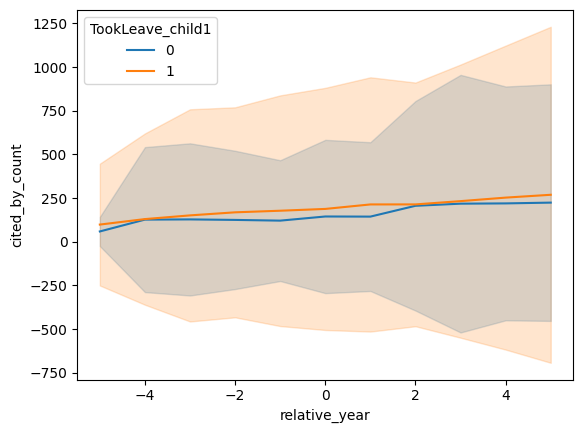

In [ ]:
# checking trends
df_long['relative_year'] = df_long['year'] - df_long['YearOfBirth_child1']

import seaborn as sns

sns.lineplot(
    data=df_long[df_long['relative_year'].between(-5, 5)],
    x='relative_year',
    y='cited_by_count',
    hue='TookLeave_child1',
    estimator='mean',
    ci='sd' 
)


In [118]:
#  Restrict to One Academic Position Group 
df_teanured = df_long[df_long['AcademicPosition'].str.startswith('I am tenured')]
df_teanure_track = df_long[df_long['AcademicPosition'].str.startswith('I am a tenure-track faculty')]
df_unteanured = df_long[df_long['AcademicPosition'].str.startswith('I am a non-tenure-track faculty')]
df_other = df_long[~df_long['AcademicPosition'].str.startswith(('Other'))]
df_postdoc = df_long[df_long['AcademicPosition'].str.startswith('I am a postdoc')]

<Axes: xlabel='relative_year', ylabel='cited_by_count'>

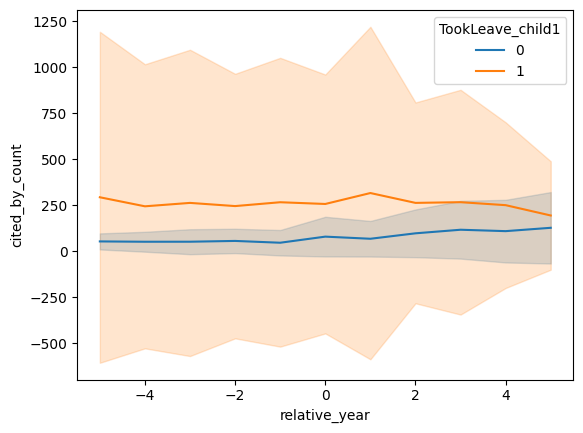

In [114]:
# looking at one group only to check balance in

df_teanure_track.groupby(['TookLeave_child1', 'post'])['ResponseId'].nunique()

sns.lineplot(
    data=df_teanure_track[df_teanure_track['relative_year'].between(-5, 5)],
    x='relative_year',
    y='cited_by_count',
    hue='TookLeave_child1',
    estimator='mean',
    errorbar='sd'
)


In [115]:
# rerun fixes effects regression on this subset

from linearmodels.panel import PanelOLS

df_model= df_teanure_track.set_index(['ResponseId', 'year'])


df_model['EntityEffects'] = df_model.index.get_level_values('ResponseId')
df_model['TimeEffects'] = df_model.index.get_level_values('year')

model = PanelOLS.from_formula(
    'cited_by_count ~ 1 + treated_post + EntityEffects + TimeEffects',
    data=df_model,
    drop_absorbed=True
)
results = model.fit()
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:         cited_by_count   R-squared:                        0.0036
Estimator:                   PanelOLS   R-squared (Between):             -0.0066
No. Observations:                 933   R-squared (Within):               0.0005
Date:                Tue, Jul 08 2025   R-squared (Overall):             -0.0043
Time:                        13:06:13   Log-likelihood                   -6401.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.0873
Entities:                          73   P-value                           0.0793
Avg Obs:                       12.781   Distribution:                   F(1,846)
Min Obs:                       6.0000                                           
Max Obs:                       14.000   F-statistic (robust):             3.0873
                            

The model compares professors who took leave to those who didn’t, looking at their average yearly citations after childbirth, controlling for individual and year effects.

## Not teanured 

<Axes: xlabel='relative_year', ylabel='cited_by_count'>

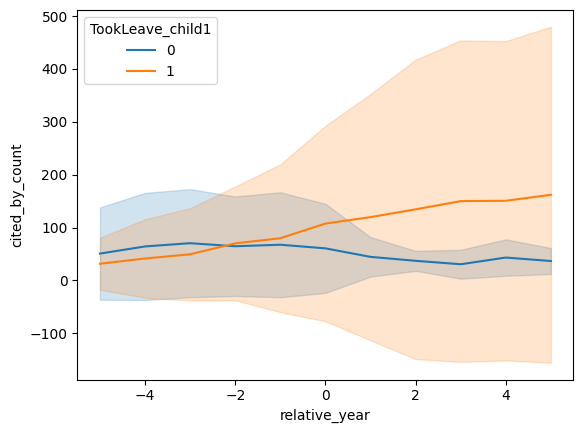

In [116]:
# looking at one group only to check balance in

df_unteanured.groupby(['TookLeave_child1', 'post'])['ResponseId'].nunique()

sns.lineplot(
    data=df_unteanured[df_unteanured['relative_year'].between(-5, 5)],
    x='relative_year',
    y='cited_by_count',
    hue='TookLeave_child1',
    estimator='mean',
    errorbar='sd'
)

In [117]:
# rerun fixes effects regression on this subset

from linearmodels.panel import PanelOLS

df_model= df_unteanured.set_index(['ResponseId', 'year'])


df_model['EntityEffects'] = df_model.index.get_level_values('ResponseId')
df_model['TimeEffects'] = df_model.index.get_level_values('year')

model = PanelOLS.from_formula(
    'cited_by_count ~ 1 + treated_post + EntityEffects + TimeEffects',
    data=df_model,
    drop_absorbed=True
)
results = model.fit()
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:         cited_by_count   R-squared:                        0.0039
Estimator:                   PanelOLS   R-squared (Between):             -0.0045
No. Observations:                1075   R-squared (Within):               0.0052
Date:                Tue, Jul 08 2025   R-squared (Overall):          -6.992e-05
Time:                        13:20:59   Log-likelihood                   -6711.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.8046
Entities:                          86   P-value                           0.0514
Avg Obs:                       12.500   Distribution:                   F(1,975)
Min Obs:                       4.0000                                           
Max Obs:                       14.000   F-statistic (robust):             3.8046
                            

Taking parental leave is associated with a +20 citation increase per year after childbirth for unteanured but this effect is only marginally statistically significant.

## postdoc

<Axes: xlabel='relative_year', ylabel='cited_by_count'>

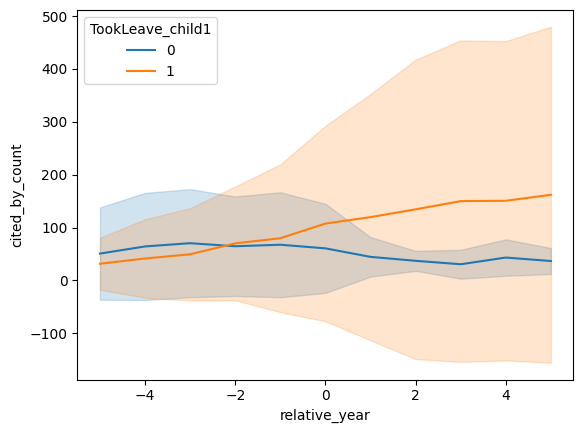

In [119]:
# looking at one group only to check balance in

df_postdoc.groupby(['TookLeave_child1', 'post'])['ResponseId'].nunique()

sns.lineplot(
    data=df_unteanured[df_unteanured['relative_year'].between(-5, 5)],
    x='relative_year',
    y='cited_by_count',
    hue='TookLeave_child1',
    estimator='mean',
    errorbar='sd'
)

In [120]:
# rerun fixes effects regression on this subset

from linearmodels.panel import PanelOLS

df_model= df_postdoc.set_index(['ResponseId', 'year'])


df_model['EntityEffects'] = df_model.index.get_level_values('ResponseId')
df_model['TimeEffects'] = df_model.index.get_level_values('year')

model = PanelOLS.from_formula(
    'cited_by_count ~ 1 + treated_post + EntityEffects + TimeEffects',
    data=df_model,
    drop_absorbed=True
)
results = model.fit()
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:         cited_by_count   R-squared:                        0.0008
Estimator:                   PanelOLS   R-squared (Between):              0.0010
No. Observations:                1177   R-squared (Within):              -0.0058
Date:                Tue, Jul 08 2025   R-squared (Overall):             -0.0005
Time:                        13:55:04   Log-likelihood                   -7453.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.8474
Entities:                         106   P-value                           0.3575
Avg Obs:                       11.104   Distribution:                  F(1,1057)
Min Obs:                       2.0000                                           
Max Obs:                       14.000   F-statistic (robust):             0.8474
                            

For postdocs, the model finds no significant effect of parental leave on citations after childbirth, once individual and year effects are accounted for

In [121]:
# let's see the possible main_domains available in this dataset

unique_main_domains = df_long.drop_duplicates('ResponseId')['Discipline'].unique()
print(f"Number of unique main domains: {len(unique_main_domains)}")
print(unique_main_domains)

Number of unique main domains: 4
['Social Sciences' 'Health Sciences' 'Physical Sciences' 'Life Sciences']


In [132]:
df_long.head()
len(df_long)

9328

In [ ]:
# 2 responseIds will be dropped due to unknown gender for now
ids_to_drop = df_long[df_long["Gender"] == "Prefer not to answer"]["ResponseId"].unique()
df_long = df_long[~df_long["ResponseId"].isin(ids_to_drop)].copy()

In [139]:
#  Restrict to One Academic Position Group 
df_tenured = df_long[df_long['AcademicPosition'].str.startswith('I am tenured')]
df_tenure_track = df_long[df_long['AcademicPosition'].str.startswith('I am a tenure-track faculty')]
df_untenured = df_long[df_long['AcademicPosition'].str.startswith('I am a non-tenure-track faculty')]
df_other = df_long[~df_long['AcademicPosition'].str.startswith(('Other'))]
df_postdoc = df_long[df_long['AcademicPosition'].str.startswith('I am a postdoc')]

In [ ]:
# let's try to do a plot like Morgan et al did it

def subset_by_filters(df, position_filter, discipline, gender, took_leave):
    df_pos = df[df['AcademicPosition'].str.startswith(position_filter)]
    return df_pos[
        (df_pos['Discipline'] == discipline) &
        (df_pos['Gender'] == gender) &
        (df_pos['TookLeave_child1'] == took_leave)
    ]



# Define the main domains
disciplines = [
    'Social Sciences',
    'Health Sciences',
    'Physical Sciences',
    'Life Sciences'
]

# Gender and leave flags
genders = ['Woman', 'Man']
leave_statuses = [0, 1]

# Academic position filter
position_filter = 'I am tenured'


In [141]:
subset_dict = {}

for discipline in disciplines:
    for gender in genders:
        for leave in leave_statuses:
            discipline_key = discipline.lower().replace(" ", "_")[:2]  # ss, he, ph, li
            gender_key = gender.lower()  # woman / man
            leave_key = 'leave' if leave == 1 else 'noleave'

            key = f"{discipline_key}_{gender_key}_{leave_key}"

            subset_dict[key] = subset_by_filters(
                df=df_long,
                position_filter=position_filter,
                discipline=discipline,
                gender=gender,
                took_leave=leave
            )


In [145]:
from collections import defaultdict

grouped_keys = defaultdict(list)
for k in subset_dict:
    prefix = k.split('_')[0]
    grouped_keys[prefix].append(k)

for domain in ['so', 'he', 'ph', 'li']:
    print(f"\n—— {domain.upper()} ——")
    for k in sorted(grouped_keys[domain]):
        df_group = subset_dict[k]
        n_rows = len(df_group)
        n_unique = df_group['ResponseId'].nunique()
        print(f"{k}: {n_rows} rows ({n_unique} unique researchers)")



—— SO ——
so_man_leave: 311 rows (24 unique researchers)
so_man_noleave: 270 rows (21 unique researchers)
so_woman_leave: 607 rows (47 unique researchers)
so_woman_noleave: 115 rows (9 unique researchers)

—— HE ——
he_man_leave: 167 rows (12 unique researchers)
he_man_noleave: 151 rows (11 unique researchers)
he_woman_leave: 302 rows (22 unique researchers)
he_woman_noleave: 79 rows (6 unique researchers)

—— PH ——
ph_man_leave: 819 rows (59 unique researchers)
ph_man_noleave: 641 rows (46 unique researchers)
ph_woman_leave: 856 rows (62 unique researchers)
ph_woman_noleave: 56 rows (4 unique researchers)

—— LI ——
li_man_leave: 196 rows (14 unique researchers)
li_man_noleave: 112 rows (8 unique researchers)
li_woman_leave: 505 rows (37 unique researchers)
li_woman_noleave: 14 rows (1 unique researchers)


In [144]:
df_check = subset_dict['li_woman_noleave']
n_unique_ids = df_check['ResponseId'].nunique()
print(f"Unique researchers: {n_unique_ids} / Total rows: {len(df_check)}")


Unique researchers: 1 / Total rows: 14


### TWFE

In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

df_long = df_long.set_index(['ResponseId', 'year'])

df_twfe = df_long[['cited_by_count', 'treated_post']].copy()
df_twfe['EntityEffects'] = df_twfe.index.get_level_values('ResponseId')
df_twfe['TimeEffects'] = df_twfe.index.get_level_values('year')

In [82]:
# fit the model

model = PanelOLS.from_formula(
    'cited_by_count ~ 1 + treated_post + EntityEffects + TimeEffects',
    data=df_twfe,
    drop_absorbed=True
)

results = model.fit()
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:         cited_by_count   R-squared:                     8.838e-06
Estimator:                   PanelOLS   R-squared (Between):             -0.0001
No. Observations:                9328   R-squared (Within):           -1.012e-05
Date:                Tue, Jul 08 2025   R-squared (Overall):           7.973e-05
Time:                        10:08:04   Log-likelihood                -7.407e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.0760
Entities:                         719   P-value                           0.7828
Avg Obs:                       12.974   Distribution:                  F(1,8595)
Min Obs:                       2.0000                                           
Max Obs:                       14.000   F-statistic (robust):             0.0760
                            

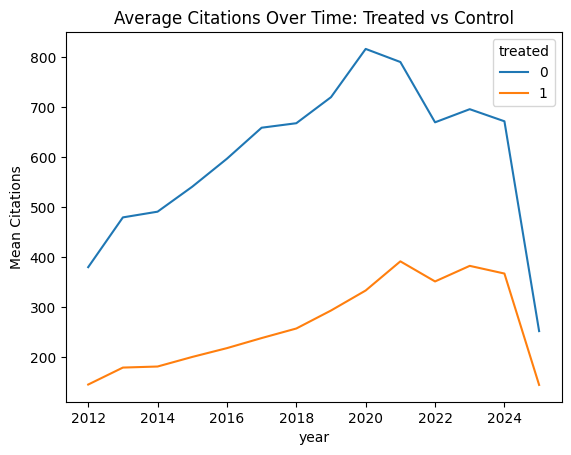

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

df_long['treated'] = df_long.groupby('ResponseId')['treated_post'].transform('max')  # assign 1 if ever treated

avg_outcomes = (
    df_long
    .groupby(['year', 'treated'])['cited_by_count']
    .mean()
    .reset_index()
)

sns.lineplot(data=avg_outcomes, x='year', y='cited_by_count', hue='treated')
plt.title('Average Citations Over Time: Treated vs Control')
plt.ylabel('Mean Citations')
plt.show()
